In [1]:
# Import Dependencies
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Requests/Time
import requests
import time

# parsing
from bs4 import BeautifulSoup

# Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Launch the browser
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

## Step 1: Visit the Website

In [3]:
# Set the url to visit
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Use the browser to visit the url
browser.visit(url)

## Step 2: Scrape the Table

In [4]:
# Gather the html from the current page in the browser
html = browser.html

# soupify
soup = BeautifulSoup(html, 'lxml')

In [5]:
# Extract all rows of data - might not need to do this
data_rows = soup.find_all('tr', {'class': 'data-row'})

## Step 3: Store the Data

In [6]:
# Create a Pandas Dataframe
# Will need to create a "rows" list and then add: id, terrestrial_date, sol, ls, month, min_temp, and pressure
# just do this like shown in the Stack Overflow example from class
rows = []

for data_line in data_rows:
    # data stores all the items listed under the table row which can be indexed to find the individual row items
    data = data_line.find_all('td')

    # Extract the data
    id = data[0].text.strip()
    terrestrial_date = data[1].text.strip()
    sol = data[2].text.strip()
    ls = data[3].text.strip()
    month = data[4].text.strip()
    min_temp = data[5].text.strip()
    pressure = data[6].text.strip()

    # Create the row
    row = {
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    }

    # Add new line to the rows list
    rows.append(row)

# Create a DataFrame with the raw data (including the incorrect data types)
raw_df = pd.DataFrame(rows)
raw_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


## Step 4: Prepare Data for Analysis

In [7]:
# Check data type of each column
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [8]:
# Change data types for data analysis
# To do multiple data type changes at once, got idea from: https://stackoverflow.com/a/70079246/23471668
df = raw_df.astype({'terrestrial_date': "datetime64[ns]", 
                    'sol': 'int64', 
                    'ls': 'int64', 
                    'month': 'int64',
                    'min_temp': 'float64',
                    'pressure': 'float64'})

In [9]:
# Check data types of each column again to confirm changes were successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


## Step 5: Analyze the Data
---
Write-up:
- The coldest month on Mars is, on average, the 3rd month, while the 8th month is the warmest.
- On average, the 6th month has the lowest pressure while the 9th month has the highest pressure on Mars.
- Looking at the plot, the difference between troughs is roughly 675 days (from 475 to 1150 days) which would reflect the number of days in a year on Mars

In [10]:
# How many months are there on Mars?
months = df.month.value_counts().sort_index()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [11]:
# How many Martian days' worth of data are there?
days = len(df.id)
days

1867

In [12]:
# What is the average low temperature by month?
avg_min_temp = df.min_temp.groupby(df.month).mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

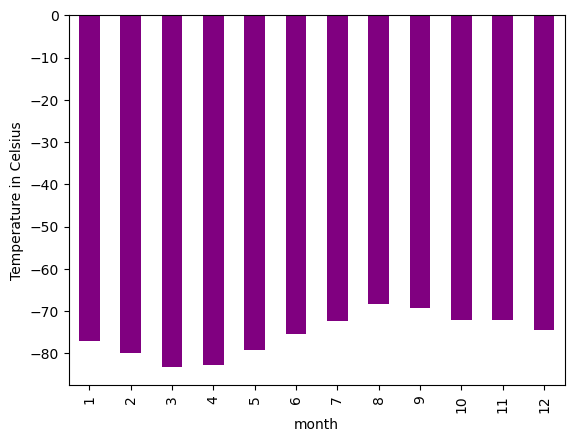

In [13]:
# Plot average temperature by month using a bar chart
avg_min_temp.plot(kind='bar', ylabel='Temperature in Celsius', color='purple')

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

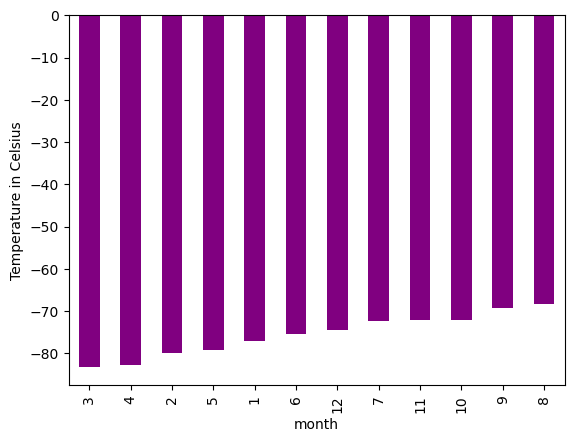

In [14]:
# Identify the coldest and hottest months in Curiosity's location - Just need to sort by Temperature and then replot the graph
avg_min_temp.sort_values().plot(kind='bar', ylabel='Temperature in Celsius', color='purple')

In [15]:
# Average Pressure by Martian month
avg_press = df.pressure.groupby(df.month).mean()
avg_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month', ylabel='Pressure (atm)'>

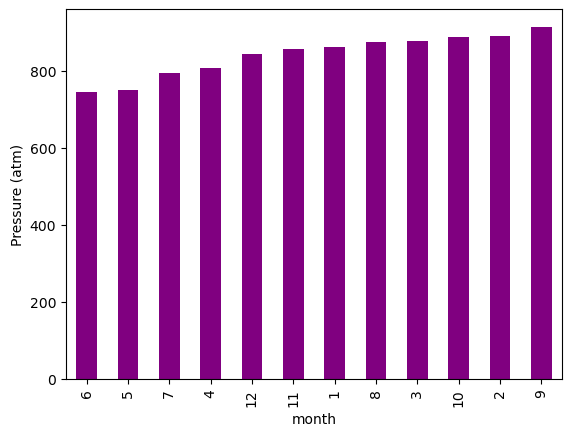

In [16]:
# Plot average pressure by month 
avg_press.sort_values().plot(kind='bar', ylabel='Pressure (atm)', color='purple')

<Axes: xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature'>

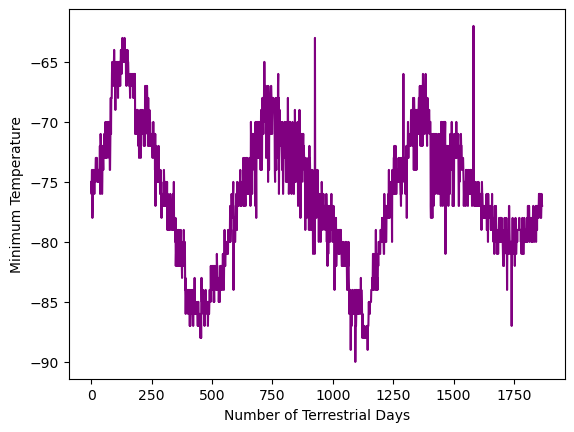

In [17]:
# How many terrestrial (earth) days are there in a Martian year?
# Plot daily minimum temperature (y-axis); x-axis is the day of the year
df.min_temp.plot(kind='line', xlabel='Number of Terrestrial Days', ylabel='Minimum Temperature', color='purple')

## Step 6: Save the Data

In [18]:
# Write the data to a CSV
df.to_csv("mars_temperature.csv", encoding='utf-8', index=False)

In [19]:
browser.quit()